In [1]:
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split


In [2]:
#load dataset
file_path = Path("Data_Set_Final_LTD_Slope_Intercept.csv")
df = pd.read_csv(file_path)
df.head()

,FIPS_code,County,State,Lung_Cancer,PM2.5,Status_Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable


In [4]:
#remove unnecessary columns
cleaned_df = df.drop(columns=['County', 'State','Status_Variable', 'LTD', 'Intercept', 'Slope', 'Status', 'Inter', 'Slp', 'control', 'treat', 'Local_Treat'])
cleaned_df.head()

,FIPS_code,Lung_Cancer,PM2.5,Land_EQI,Sociod_EQI,Built_EQI,CLU50_1,PM10,SO2,NO2,...,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,LCI,UCI,AAC,RT
0,1001,73.9,12.06,-0.706591,0.670436,-0.497301,1,15.07,10.661088,123.657648,...,0.054815,0.388556,0.008080,0.955385,-1.109728,0.00,64.3,84.6,44,stable
1,1003,68.4,11.12,-1.084299,0.553073,0.401585,2,19.99,17.146847,247.742253,...,0.021069,0.428278,0.001090,0.717964,-0.565911,0.20,63.9,73.1,181,stable
2,1005,76.1,12.36,-1.281470,-1.236294,0.048854,3,15.77,23.257118,183.193624,...,0.014027,0.199725,0.000513,0.131007,-0.978090,-0.95,63.3,90.9,26,stable
3,1007,86.4,12.24,-0.827410,-0.600018,-1.290857,4,14.92,7.630953,127.779935,...,0.009613,0.211741,0.000225,0.065289,-0.968173,-1.09,71.2,104.1,23,stable
4,1009,73.1,12.97,-0.622934,0.296509,-1.262740,5,17.90,8.913795,95.198094,...,0.022128,0.300100,0.000429,0.402194,-0.718645,-0.51,64.5,82.6,54,stable


In [5]:
cleaned_df['RT'].value_counts()

stable     2267
falling     237
rising       51
*            47
Name: RT, dtype: int64

In [6]:
cleaned_df = cleaned_df[cleaned_df.RT != '*']
cleaned_df

,FIPS_code,Lung_Cancer,PM2.5,Land_EQI,Sociod_EQI,Built_EQI,CLU50_1,PM10,SO2,NO2,...,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,LCI,UCI,AAC,RT
0,1001,73.9,12.06,-0.706591,0.670436,-0.497301,1,15.07,10.661088,123.657648,...,0.054815,0.388556,0.008080,0.955385,-1.109728,0.00,64.3,84.6,44,stable
1,1003,68.4,11.12,-1.084299,0.553073,0.401585,2,19.99,17.146847,247.742253,...,0.021069,0.428278,0.001090,0.717964,-0.565911,0.20,63.9,73.1,181,stable
2,1005,76.1,12.36,-1.281470,-1.236294,0.048854,3,15.77,23.257118,183.193624,...,0.014027,0.199725,0.000513,0.131007,-0.978090,-0.95,63.3,90.9,26,stable
3,1007,86.4,12.24,-0.827410,-0.600018,-1.290857,4,14.92,7.630953,127.779935,...,0.009613,0.211741,0.000225,0.065289,-0.968173,-1.09,71.2,104.1,23,stable
4,1009,73.1,12.97,-0.622934,0.296509,-1.262740,5,17.90,8.913795,95.198094,...,0.022128,0.300100,0.000429,0.402194,-0.718645,-0.51,64.5,82.6,54,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,56037,45.3,6.40,0.329106,0.832869,1.309324,40,11.26,51.633922,342.108999,...,0.007201,0.204528,0.000227,-0.039545,1.130375,1.09,35.4,57.0,16,stable
2598,56039,22.6,6.67,0.316508,1.812128,2.418939,47,10.40,39.036416,322.610755,...,0.005966,0.080880,0.000114,-0.557297,1.071576,1.67,14.1,34.4,5,stable
2599,56041,37.1,6.57,0.253324,0.715908,1.134188,39,8.35,65.490741,529.309963,...,0.002770,0.089568,0.000245,-0.814369,1.162652,0.69,25.2,52.5,7,stable
2600,56043,51.1,6.33,0.151024,-0.067995,0.728454,13,7.21,157.728659,284.452099,...,0.011684,0.157553,0.000184,-0.244298,1.004629,0.38,35.1,73.3,7,stable


In [7]:
cleaned_df['RT'] = cleaned_df['RT'].replace({'stable':0, 'rising':1, 'falling':2})
cleaned_df['RT'] = cleaned_df['RT'].astype(int)

In [9]:
#define x (features) and y (target) sets

y = cleaned_df["Lung_Cancer"].values
X = cleaned_df.drop("Lung_Cancer", axis=1)

In [10]:
#use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42 )

In [11]:
#create linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients:  [-5.90372042e-07  1.73813169e-02 -6.80429075e-01 -9.64648553e-01
 -9.20295995e-01  6.93338512e-04 -6.96813449e-03 -3.35425395e-05
  1.03441667e-05 -4.85264630e-07 -6.54714515e-06 -1.05605942e+00
 -3.10096622e-02 -3.19786780e-01 -7.76839263e-01 -4.35574305e-01
  2.35797879e+00  6.19385596e-01  4.02974454e-01 -1.09766931e-03
 -3.64719300e-03]
y-axis intercept: -0.027525143167324018


In [13]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9994501412625661
Testing Score: 0.9992890980723492


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model with all the features in X
model.fit(X,y)

score = model.score(X,y)
print(f"Score: {score}")

Score: 0.9994171753656397


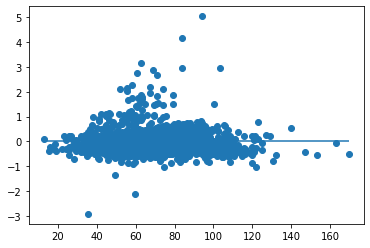

In [15]:
 predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [16]:
from sklearn import model_selection
import pickle

filename = 'linear_regression_model.pt'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[ 41.306999    44.71834855  73.32370261  78.05906838  89.21380077
  71.06209452  51.75871878  77.54874834  95.94934074  55.43675815
  63.61761002  65.44600151  70.06117698  54.96287483  53.86329473
  77.36118329  47.37183668  74.37420839  59.58753283  83.93790414
  56.77396969  62.30450947  58.35581828  71.88648525  89.56682008
  51.32906769  81.163493    77.50054496  96.98510305  94.93151344
  88.89538387  39.79689482  62.14425952  59.46005777  77.82049642
  75.87626484  77.20450184  78.94773329  46.26420474  47.97899972
  83.88292248  76.51207061  65.80051766  99.30602459  56.77351047
  70.21198875  74.89418281  76.119015    63.44536357  75.08837806
  73.42209847  60.60862587  66.60371191  52.12046707  49.85011453
  63.98972027 106.35991768  43.86368464  77.165323   101.70736118
  37.64784055  75.03186631  59.24104678  68.3007909   68.30418612
  88.28855694  70.49291594  53.10348244  80.92987477  78.70661023
  35.89782705  48.46498265  81.06312155  60.4040707   71.29509749
 103.18139